In [1]:
import re
import fitz
import string
import ssl
import nltk
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
from random import randint
import matplotlib.colors as mcolors


In [2]:
# Load PDF report
file_path = 'ESG Reports/2022_Apple_ESG_Report.pdf'

In [3]:
# Define the words for each category
governance_words = [
    'align', 'aligned', 'aligning', 'alignment', 'aligns', 'bylaw', 'bylaws', 'charter', 
    'charters', 'culture', 'death', 'duly', 'parents', 'independent', 'compliance', 'conduct', 
    'conformity', 'governance', 'misconduct', 'parachute', 'parachutes', 'perquisites', 'plane', 
    'planes', 'poison', 'retirement', 'approval', 'approvals', 'approve', 'approved', 'approves', 
    'approving', 'assess', 'assessed', 'assesses', 'assessing', 'assessment', 'assessments', 
    'audit', 'audited', 'auditing', 'auditor', 'auditors', 'audits', 'control', 'controls', 'coso', 
    'detect', 'detected', 'detecting', 'detection', 'evaluate', 'evaluated', 'evaluates', 'evaluating', 
    'evaluation', 'evaluations', 'examination', 'examinations', 'examine', 'examined', 'examines', 
    'examining', 'irs', 'oversee', 'overseeing', 'oversees', 'oversight', 'review', 'reviewed', 
    'reviewing', 'reviews', 'rotation', 'test', 'tested', 'testing', 'tests', 'treadway', 'backgrounds', 
    'independence', 'leadership', 'nomination', 'nominations', 'nominee', 'nominees', 'perspectives', 
    'qualifications', 'refreshment', 'skill', 'skills', 'succession', 'tenure', 'vacancies', 'vacancy', 
    'appreciation', 'award', 'awarded', 'awarding', 'awards', 'bonus', 'bonuses', 'cd', 'compensate', 
    'compensated', 'compensates', 'compensating', 'compensation', 'eip', 'iso', 'isos', 'payout', 'payouts', 
    'pension', 'prsu', 'prsus', 'recoupment', 'remuneration', 'reward', 'rewarding', 'rewards', 'rsu', 
    'rsus', 'salaries', 'salary', 'severance', 'vest', 'vested', 'vesting', 'vests', 'ballot', 'ballots', 
    'cast', 'consent', 'elect', 'elected', 'electing', 'election', 'elections', 'elects', 'nominate', 
    'nominated', 'plurality', 'proponent', 'proponents', 'proposal', 'proposals', 'proxies', 'quorum', 
    'vote', 'voted', 'votes', 'voting', 'brother', 'clicking', 'conflict', 'conflicts', 'family', 
    'grandchildren', 'grandparent', 'grandparents', 'inform', 'insider', 'insiders', 'inspector', 
    'inspectors', 'interlocks', 'nephews', 'nieces', 'posting', 'relatives', 'siblings', 'sister', 
    'son', 'spousal', 'spouse', 'spouses', 'stepchildren', 'stepparents', 'transparency', 'transparent', 
    'visit', 'visiting', 'visits', 'webpage', 'website', 'attract', 'attracting', 'attracts', 'incentive', 
    'incentives', 'interview', 'interviews', 'motivate', 'motivated', 'motivates', 'motivating', 
    'motivation', 'recruit', 'recruiting', 'recruitment', 'retain', 'retainer', 'retainers', 'retaining', 
    'retention', 'talent', 'talented', 'talents', 'cobc', 'ethic', 'ethical', 'ethically', 'ethics', 
    'honesty', 'bribery', 'corrupt', 'corruption', 'crimes', 'embezzlement', 'grassroots', 'influence', 
    'influences', 'influencing', 'lobbied', 'lobbies', 'lobby', 'lobbying', 'lobbyist', 'lobbyists', 
    'whistleblower', 'announce', 'announced', 'announcement', 'announcements', 'announces', 'announcing', 
    'communicate', 'communicated', 'communicates', 'communicating', 'erm', 'fairly', 'integrity', 'liaison', 
    'presentation', 'presentations', 'sustainable', 'asc', 'disclose', 'disclosed', 'discloses', 'disclosing', 
    'disclosure', 'disclosures', 'fasb', 'gaap', 'objectivity', 'press', 'sarbanes', 'engagement', 
    'engagements', 'feedback', 'hotline', 'investor', 'invite', 'invited', 'mail', 'mailed', 'mailing', 
    'mailings', 'notice', 'relations', 'stakeholder', 'stakeholders', 'compact', 'ungc'
]

environmental_words = [
    'clean', 'environmental', 'epa', 'sustainability', 'climate', 'warming', 'biofuels', 'biofuel', 
    'green', 'renewable', 'solar', 'stewardship', 'wind', 'emission', 'emissions', 'ghg', 'ghgs', 
    'greenhouse', 'atmosphere', 'emit', 'agriculture', 'deforestation', 'pesticide', 'pesticides', 
    'wetlands', 'zoning', 'biodiversity', 'species', 'wilderness', 'wildlife', 'freshwater', 
    'groundwater', 'water', 'cleaner', 'cleanup', 'coal', 'contamination', 'fossil', 'resource', 
    'air', 'carbon', 'nitrogen', 'pollution', 'superfund', 'biphenyls', 'hazardous', 'householding', 
    'pollutants', 'printing', 'recycling', 'toxic', 'waste', 'wastes', 'weee', 'recycle'
]

social_words = [
    'citizen', 'citizens', 'csr', 'disabilities', 'disability', 'disabled', 'human', 'nations', 
    'social', 'un', 'veteran', 'veterans', 'vulnerable', 'children', 'epidemic', 'health', 'healthy', 
    'ill', 'illness', 'pandemic', 'childbirth', 'drug', 'medicaid', 'medicare', 'medicine', 'medicines', 
    'hiv', 'alcohol', 'drinking', 'bugs', 'conformance', 'defects', 'fda', 'inspection', 'inspections', 
    'minerals', 'standardization', 'warranty', 'dignity', 'discriminate', 'discriminated', 'discriminating', 
    'discrimination', 'equality', 'freedom', 'humanity', 'nondiscrimination', 'sexual', 'communities', 
    'community', 'expression', 'marriage', 'privacy', 'peace', 'bargaining', 'eeo', 'fairness', 'fla', 
    'harassment', 'injury', 'labor', 'overtime', 'ruggie', 'sick', 'wage', 'wages', 'workplace', 'bisexual', 
    'diversity', 'ethnic', 'ethnically', 'ethnicities', 'ethnicity', 'female', 'females', 'gay', 'gays', 
    'gender', 'genders', 'homosexual', 'immigration', 'lesbian', 'lesbians', 'lgbt', 'minorities', 
    'minority', 'ms', 'race', 'racial', 'religion', 'religious', 'sex', 'transgender', 'woman', 'women', 
    'occupational', 'safe', 'safely', 'safety', 'ilo', 'labour', 'eicc', 'endowment', 'endowments', 
    'people', 'philanthropic', 'philanthropy', 'socially', 'societal', 'society', 'welfare', 'charitable', 
    'charities', 'charity', 'donate', 'donated', 'donates', 'donating', 'donation', 'donations', 'donors', 
    'foundation', 'foundations', 'gift', 'gifts', 'nonprofit', 'poverty', 'courses', 'educate', 'educated', 
    'educates', 'educating', 'education', 'educational', 'learning', 'mentoring', 'scholarships', 'teach', 
    'teacher', 'teachers', 'teaching', 'training', 'employ', 'employment', 'headcount', 'hire', 'hired', 
    'hires', 'hiring', 'staffing', 'unemployment'
]

In [4]:
def cleanup_text(text):
    # remove non-breaking spaces
    text = text.replace(u'\xa0', u' ')
    # remove bullet points
    text = text.replace(u'•', u'')
    # remove any non-alphanumeric, non-hyphen characters
    text = re.sub(r'[^A-Za-z0-9- ]', '', text)
    # remove words with hyphens, as they could be compound words
    text = re.sub(r'\w+-\w+', '', text)
    return text

In [5]:
def text_process(text_str):
    if ' ' in text_str:
        text_str = text_str.replace(' ', ' ')
    if '•' in text_str:
        text_str = text_str.replace('•', ' ')
    text_str = re.sub(' +', ' ', text_str)
    if '-' in text_str:
        text_str = text_str.replace('- ', '').replace(' -', '').replace(' ,', ',').replace(' .', '.')
    text_str = text_str.strip()
    return text_str

In [6]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/stan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# # read text
# all_text = []
# with fitz.open(pdf_path) as doc:
#     for page in doc:
#         text = page.get_text()
#         text = text_process(text)
#         text = text.replace('\n', ' ')
#         text = text.replace('\u2003', ' ')
#         all_text.append(text)

        
# lemmatizer = WordNetLemmatizer()

# full_text = ' '.join(all_text).lower()
# full_text = ''.join([char for char in full_text if char not in string.punctuation])
# full_text = re.sub(' +', ' ', full_text)  # remove excessive spaces
# full_text_words = full_text.split()
# full_text_words = [cleanup_text(word) for word in full_text_words if word.strip() in environmental_words]
# full_text_words = [lemmatizer.lemmatize(word) for word in full_text_words] # add this line for lemmatization
# environmental_text = ' '.join(full_text_words)

In [ ]:
# fdist = nltk.FreqDist(full_text_words)

In [ ]:
# print(fdist.most_common(10))

In [7]:
# Green for environmental words
def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return mcolors.rgb2hex((0, randint(50, 200) / 255, 0))  # green color with random brightness


# Blue for Governance words
def blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return mcolors.rgb2hex((0, 0, randint(50, 200) / 255))  # blue color with random brightness

# Orange for Social words
def orange_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Note: RGB value for orange is (255,165,0), so we adjust the first two values (R and G) for random brightness
    return mcolors.rgb2hex((randint(200, 255) / 255, randint(100, 165) / 255, 0))  # orange color with random brightness



# def generate_wordcloud(words, title, color_func):
#     wordcloud = WordCloud(width=800, 
#                           height=800, 
#                           color_func=color_func,
#                           prefer_horizontal=0.65,
#                          min_font_size=15,
#                          relative_scaling=0,
#                           background_color="white", 
#                           stopwords=set()).generate_from_frequencies(fdist)
    
#     plt.figure(figsize=(8, 8))
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis('off')
#     plt.title(title)
#     plt.tight_layout(pad=0)
#     plt.show()
    

# environmental_text = ' '.join([word for word in full_text.lower().split() if word.lower() in environmental_words])
# generate_wordcloud(environmental_text, 'Environmental Words', green_color_func)


In [ ]:



# def generate_wordcloud(words, title, color_func):
#     wordcloud = WordCloud(width=800, 
#                           height=800, 
#                           color_func=color_func,
#                           prefer_horizontal=0.65,
#                           min_font_size=15,
#                           relative_scaling=0,
#                           background_color="white", 
#                           stopwords=set()).generate_from_frequencies(fdist)
    
#     plt.figure(figsize=(8, 8))
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis('off')
#     plt.title(title)
#     plt.tight_layout(pad=0)
#     plt.show()
    

# governance_text = ' '.join([word for word in full_text.lower().split() if word.lower() in governance_words])
# generate_wordcloud(governance_text, 'Governance Words', blue_color_func)


In [12]:
def create_word_cloud(pdf_path, word_category, color_func, title):
    all_text = []
    with fitz.open(pdf_path) as doc:
        for page in doc:
            text = page.get_text()
            text = text.replace('•', ' ')
            text = text_process(text)
            text = text.replace('\n', ' ')
            text = text.replace('\u2003', ' ')
            all_text.append(text)
    
    lemmatizer = WordNetLemmatizer()

    full_text = ' '.join(all_text).lower()
    full_text = ''.join([char for char in full_text if char not in string.punctuation])
    full_text = re.sub(' +', ' ', full_text)  # remove excessive spaces
    full_text_words = full_text.split()
    full_text_words = [cleanup_text(word) for word in full_text_words if word.strip() in word_category]
    full_text_words = [lemmatizer.lemmatize(word) for word in full_text_words] # add this line for lemmatization
    category_text = ' '.join(full_text_words)

    fdist = nltk.FreqDist(full_text_words)


    wordcloud = WordCloud(width=800, 
                          height=800, 
                          color_func=color_func,
                          prefer_horizontal=0.65,
                          min_font_size=15,
                          relative_scaling=0,
                          background_color="white", 
                          stopwords=set()).generate_from_frequencies(fdist)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()    

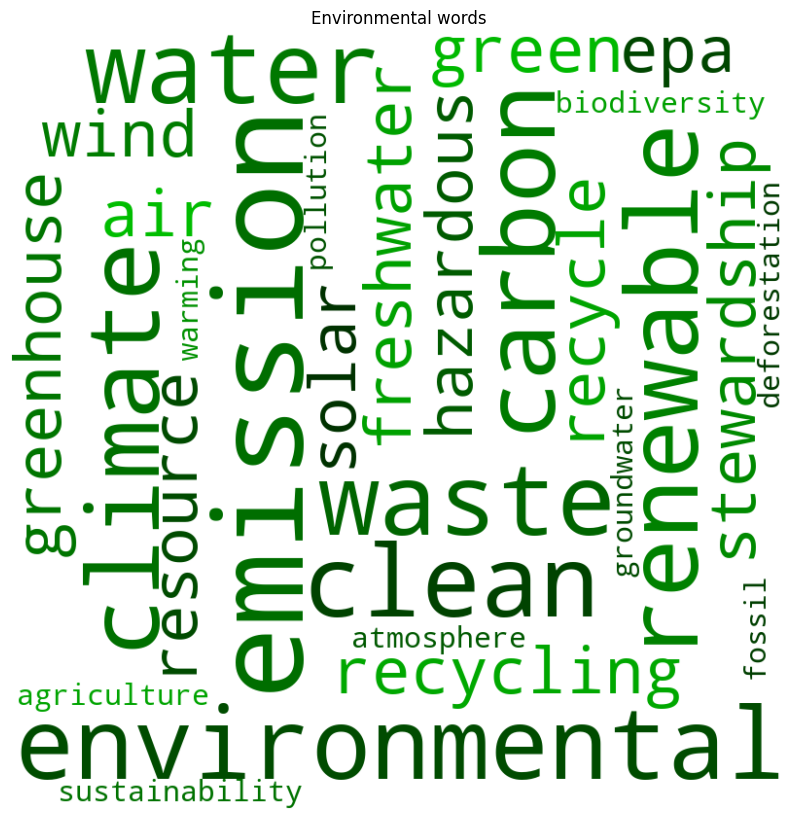

In [13]:
create_word_cloud(file_path, environmental_words, green_color_func, "Environmental words")

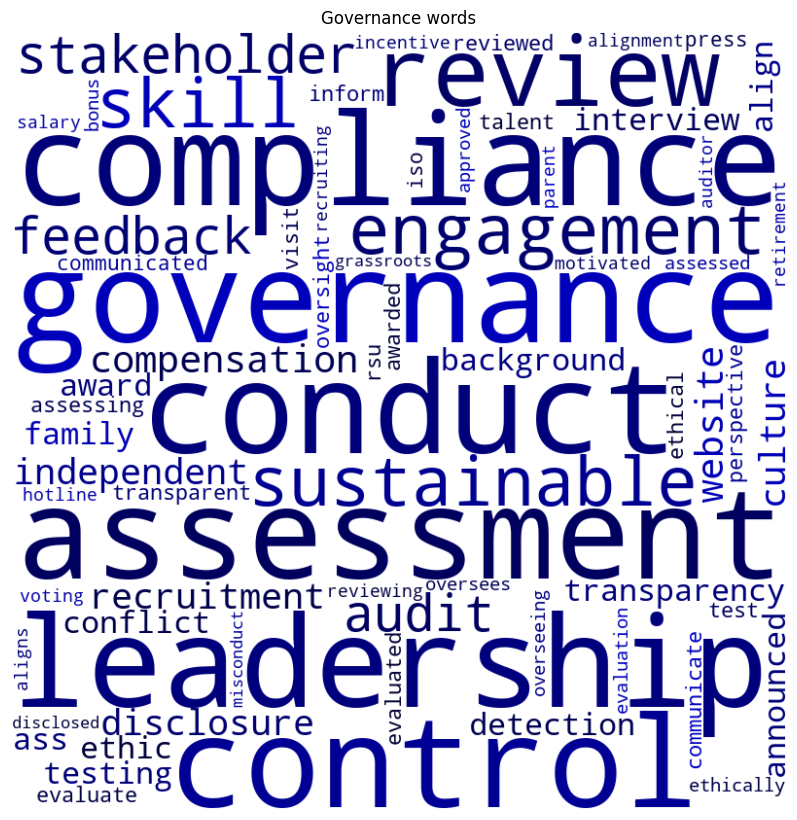

In [14]:
create_word_cloud(file_path, governance_words, blue_color_func, "Governance words")

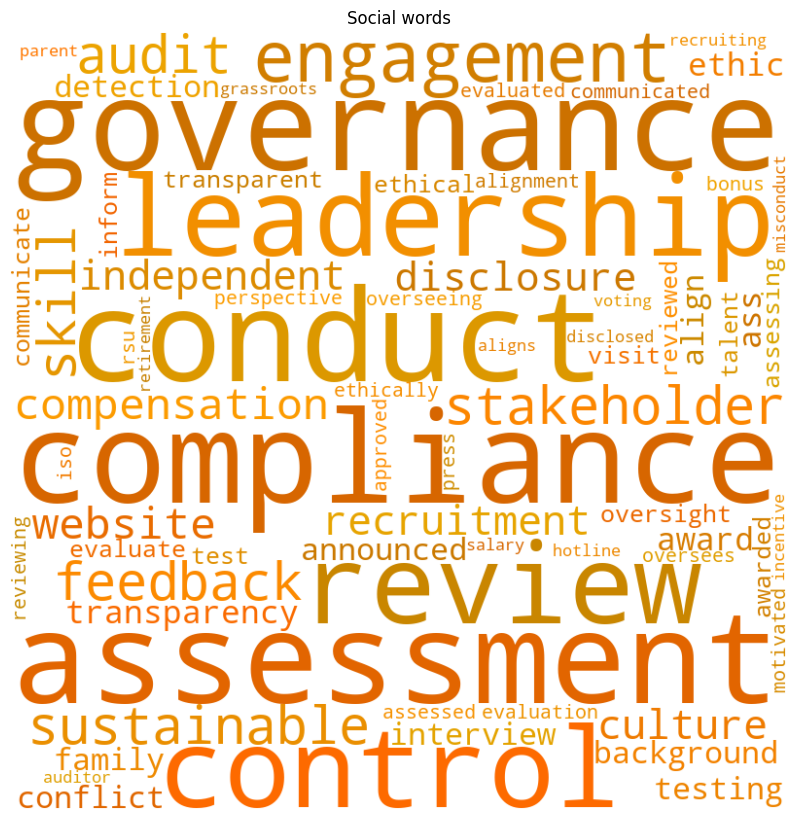

In [15]:
create_word_cloud(file_path, governance_words, orange_color_func, "Social words")